##  Võ Thành Hoàng Sơn - 19DH110660


# MLPClassifier with digits dataset
 

In [ ]:
##Import lib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install pipelinehelper -q
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from sklearn.datasets import load_digits


from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper

import warnings
warnings.filterwarnings("ignore")

In [ ]:
##Load dataset
imgs = load_digits().images
data,target = load_digits(return_X_y = True)
print(f"Data shape: {data.shape}")
print(f"Output shape: {target.shape}")


Data shape: (1797, 64)
Output shape: (1797,)


- Dataset gồm 1797 mẫu với 64 đặc trưng tương ứng với 64 điểm ảnh (8*8)
- Output gồm 1797 mẫu tương ứng kết quả của Dataset

In [ ]:
print(f"Số class: \n{pd.DataFrame(target).value_counts()}")

Số class: 
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64


## Plot some data

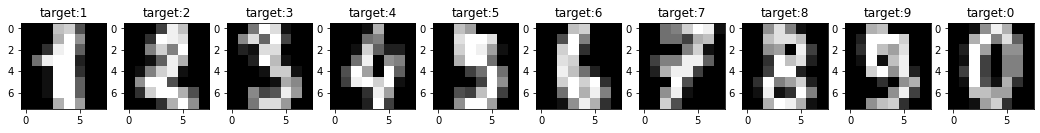

In [ ]:
plt.figure(figsize=(20,4))
for i in range(1,11):
  plt.gray()
  plt.subplot(1,11,i)
  plt.imshow(imgs[i])
  plt.title(f"target:{target[i]}")
plt.show()


## GridSearch

In [ ]:
## Custom transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import Normalizer,StandardScaler

In [ ]:
## Pipeline params


params = {}
params["data_split_train"] = 0.7
params['random_state'] = 54
params['k_fold'] = 3
 


In [ ]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer(None,validate=False)),
    ])),
    ('classifier', PipelineHelper([
        ('mlp', MLPClassifier()),

    ])),
])

# Các cấu hình thử nghiệm
parameters = {

    'scaler__selected_model': pipe.named_steps['scaler'].generate({
      'std__with_mean': [True],
      'std__with_std': [False],

      'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
      'mlp__activation': ['logistic','tanh', 'relu'],
      'mlp__hidden_layer_sizes': [(100,),(32,64,),(64,32,),(64,32,10,)],

    })
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=params["random_state"],train_size=params['data_split_train'])

In [ ]:
import os
n_cpus= os.cpu_count()
print(f"Số nhân cpu hiện có: {n_cpus}")
# Lựa chọn cấu hình: kiểm thử chéo 
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy', refit=True,n_jobs=n_cpus,verbose=10)
#Fit and train model
grid.fit(X_train, y_train)


print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

Số nhân cpu hiện có: 4
Fitting 3 folds for each of 60 candidates, totalling 180 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('mlp', {'activation': 'tanh', 'hidden_layer_sizes': (100,)}), 'scaler__selected_model': ('non', {})}
Độ chính xác:   0.98


## Define model with best params

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=params["random_state"],train_size=params['data_split_train'])
model = MLPClassifier(activation= 'tanh',hidden_layer_sizes= (100,))
model.fit(X_train,y_train)
print("Train done!")

Train done!


## Predict

In [ ]:
y_pred = model.predict(X_test)

Ma trận nhầm lẫn: 
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  3  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 63  1  0  0  0  0]
 [ 0  0  0  0  0 57  0  1  0  0]
 [ 0  0  0  0  0  1 55  0  0  0]
 [ 0  0  0  0  1  0  0 51  0  0]
 [ 0  0  1  0  1  0  0  1 46  0]
 [ 0  0  0  1  0  1  0  0  0 53]]


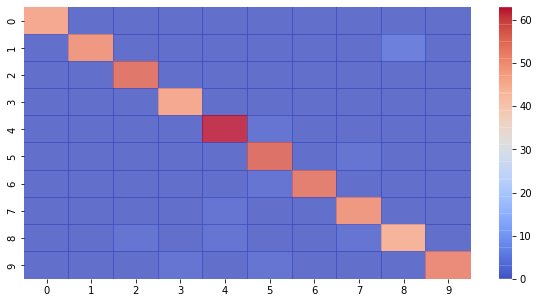

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính các độ đo
cmatrix = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cmatrix,cmap='coolwarm',alpha=0.8)

print("Ma trận nhầm lẫn: ")
print(cmatrix)

In [ ]:
# Tổng quan kết quả
metric_score = classification_report(y_pred,y_test)
print(metric_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.94      0.97        54
           2       0.98      1.00      0.99        56
           3       0.98      1.00      0.99        48
           4       0.97      0.98      0.98        64
           5       0.95      0.98      0.97        58
           6       1.00      0.98      0.99        56
           7       0.96      0.98      0.97        52
           8       0.94      0.94      0.94        49
           9       1.00      0.96      0.98        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
# Kết quả
print("Độ chính xác (precision): {:7.2f}%".format(scores[0]*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(scores[1]*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Độ chính xác (precision):   97.77%
Độ triệu hồi (recall):   97.82%
Độ đo F1 (F1-measure):   97.78%
Độ chính xác (accuracy):   97.78%
